In [1]:
import os
from PIL import Image
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset,DataLoader,random_split
from torchvision import transforms

In [11]:
class Custom_data(Dataset):
    def __init__(self,root_dir,transform=None):
        self.root_dir=root_dir
        self.transform=transform
        self.file_paths=[]
        self.class_names=sorted(os.listdir(root_dir))

        for class_name in self.class_names:
            class_path=os.path.join(self.root_dir,class_name)
            files=[os.path.join(class_path, file) for file in os.listdir(class_path)]
            self.file_paths.extend(files)

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self,idx):
        img_path=self.file_paths[idx]
        image=Image.open(img_path)

        if self.transform:
            image=self.transform(image)

        class_name=os.path.basename(os.path.dirname(img_path))
        label_idx=torch.tensor(self.class_names.index(class_name),dtype=torch.long)

        return image,label_idx,class_name

In [12]:
transform=transforms.Compose([transforms.Resize((256,256)),transforms.ToTensor()])

In [14]:
dataset=Custom_data(root_dir="D:\\21BAD014_DL\\Medicinal_Plants",transform=transform)

In [20]:
dataset.class_names

['Amaranthus Viridis',
 'Artocarpus Heterophyllus',
 'Azadirachta Indica',
 'Basella Alba',
 'Brassica Juncea',
 'Carissa Carandas',
 'Citrus Limon',
 'Ficus Auriculata',
 'Ficus Religiosa',
 'Hibiscus Rosa-sinensis',
 'Jasminum',
 'Mangifera Indica',
 'Mentha',
 'Moringa Oleifera',
 'Muntingia Calabura',
 'Murraya Koenigii',
 'Nerium Oleander',
 'Nyctanthes Arbor-tristis',
 'Ocimum Tenuiflorum',
 'Piper Betle',
 'Plectranthus Amboinicus',
 'Pongamia Pinnata',
 'Psidium Guajava',
 'Punica Granatum',
 'Santalum Album',
 'Syzygium Cumini',
 'Syzygium Jambos',
 'Tabernaemontana Divaricata',
 'Trigonella Foenum-graecum']

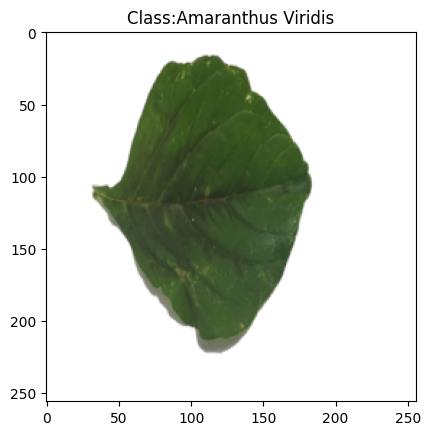

In [17]:
index=0
img,label_idx,label_name=dataset[index]

plt.imshow(img.permute(1,2,0))  #PyTorch uses(C,H,W),so permute dimensions
plt.title("Class:"+str(label_name))
plt.show()

In [18]:
print("Length of dataset:",len(dataset))
train_size=int(0.8*len(dataset))
test_size=len(dataset)-train_size
train_dataset,test_dataset=random_split(dataset,[train_size,test_size])

Length of dataset: 3501


In [21]:
train_loader=DataLoader(train_dataset,batch_size=64,shuffle=True)
val_loader=DataLoader(test_dataset,batch_size=64,shuffle=False)

In [24]:
train_loader.dataset[0]

3